In [10]:
using Serialization
using StatsPlots
using DataFrames
using Statistics
using LaTeXStrings
includet("../../lib/commondefs.jl")
pyplot()

Plots.PyPlotBackend()

In [11]:
data = deserialize("saw_bps.jls")
df = DataFrame(walklen = Int[], saw_bps = Float64[], ran4_bps = Float64[], ran3_bps = Float64[], mar_bps = Float64[], mar_ent = Float64[])
for (walklen, res) in data
    saw = res.nmar_b / res.nstep
    ran4 = res[2] / res.nstep
    ran3 = res[3] / res.nstep
    mar = res[4] / res.nstep
    mar_ent = res.hist_S
    push!(df, (walklen, saw, ran4, ran3, mar, mar_ent))
end

sort!(df);

In [12]:
println(df.mar_ent)

[1.999995935956199, 1.9999429062908993, 1.9998498644999205, 1.9999397394371483, 1.9997919613678599, 1.9995989011139366, 1.9999439091057876, 1.9999557694143948, 1.9999907280899458, 1.9999292006784903, 1.9998126123468538, 1.9998185781556936, 1.99998614570986, 1.9996118883805254, 1.9998633034048445, 1.999936290117568, 1.9997490050879654, 1.9998448609665047, 1.9999569718749022, 1.9997229715429858]


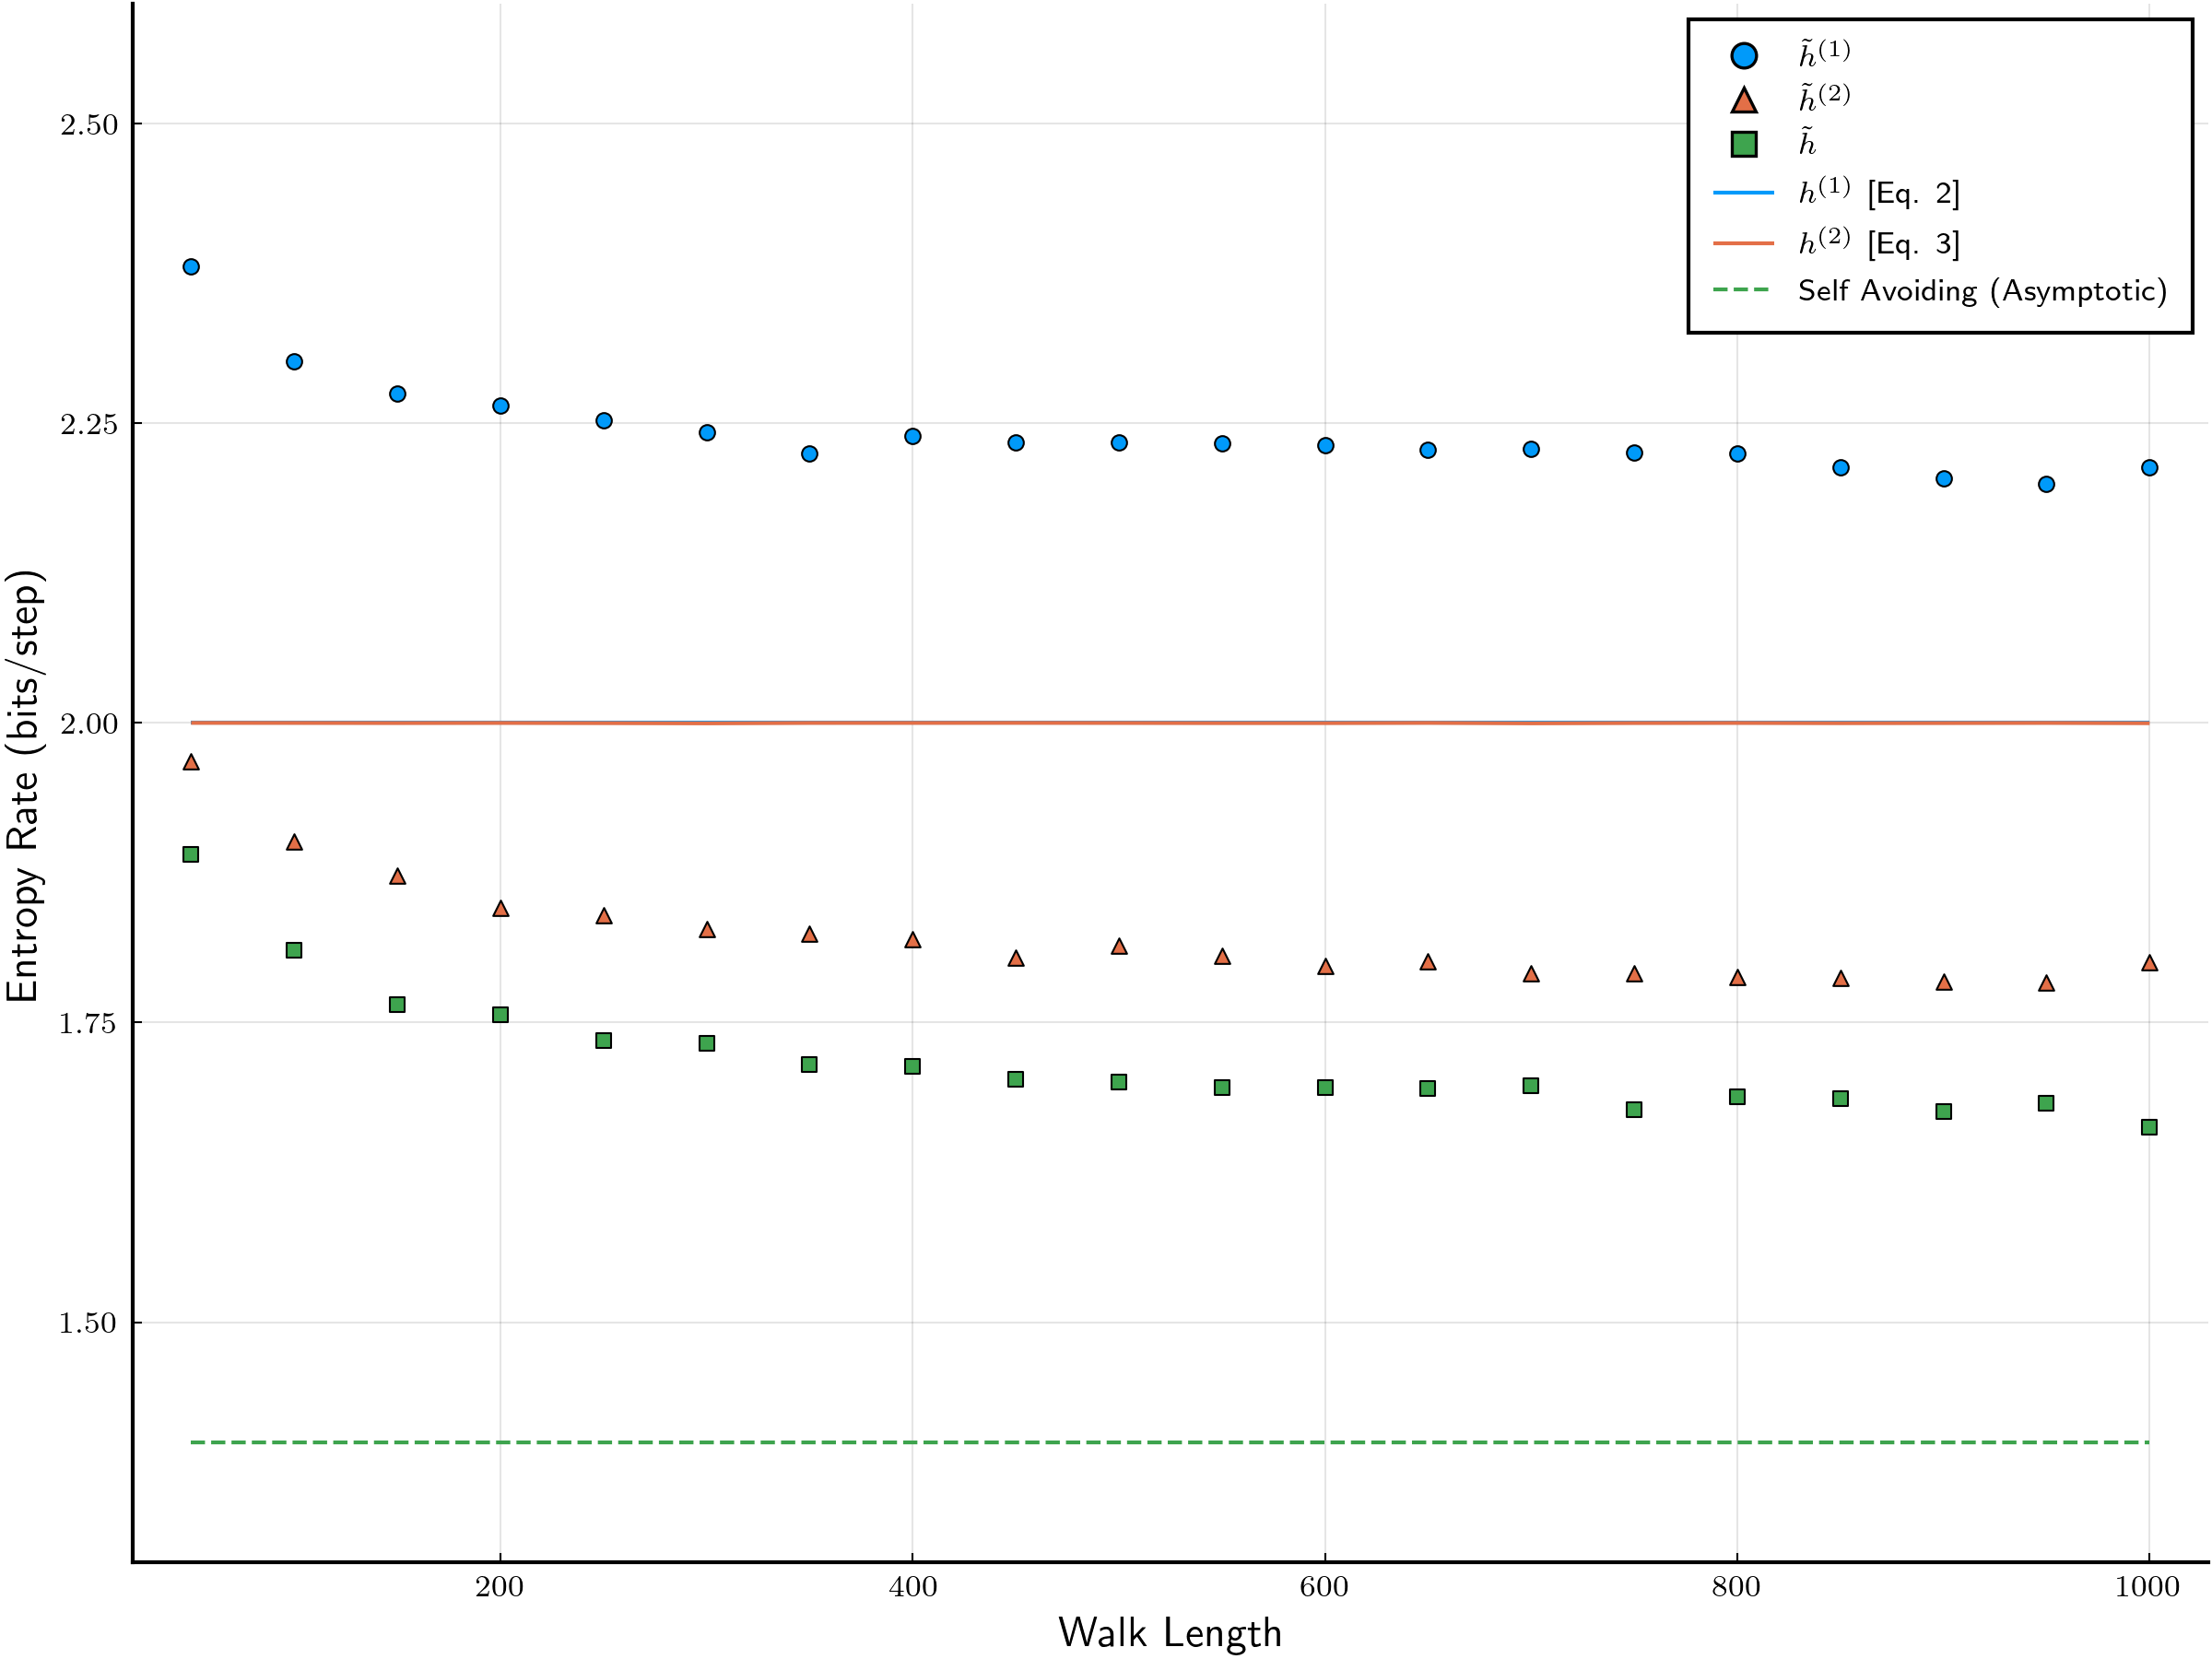

In [13]:
pyplot()
plot(xlabel="Walk Length", ylabel=bitrate_label, ylim=(1.3, 2.6), 
     dpi=300, size=(800,600))
@df df scatter!(:walklen, :ran4_bps, label=L"$\tilde{h}^{(1)}$", 
                color=markov1_col, markershape=markov1_shape, markerstrokewidth=0.5)
@df df scatter!(:walklen, :mar_bps, label=L"$\tilde{h}^{(2)}$",
                color=markov2_col, markershape=markov2_shape, markerstrokewidth=0.5)
@df df scatter!(:walklen, :saw_bps, label=L"$\tilde{h}^{\phantom{(2)}}$", 
                color=truedyn_col, markershape=truedyn_shape, markerstrokewidth=0.5)
plot!(df.walklen, [2.0 for _ in df.walklen], label=L"$h^{(1)}$ [Eq. 2]", color=markov1_col)
plot!(df.walklen, df.mar_ent, label=L"$h^{(2)}$ [Eq. 3]", color=markov2_col)
plot!(df.walklen, [log2(2.6381585) for _ in df.walklen], label="Self Avoiding (Asymptotic)", 
      linestyle=:dash, color=truedyn_col)

In [14]:
png("self-avoiding-walk.png")

In [15]:
# Numerical estimates of SAW entropy.

#=
using DelimitedFiles
include("../../lib/lib.jl")
dat = readdlm("saw/saw-1000.csv", UInt8)
x = vec(dat)
S = estimate_markov_entropy(x)
println("Markov estimate is $(S)")
=#